## Chapter 9 - Unsupervised Learning Techniques

### Question 10 - Kmeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces
X ,  y = fetch_olivetti_faces(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=300 , random_state=42 , stratify=y)

X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , train_size=200 , random_state=42 , stratify=y_train)

In [4]:
from sklearn.cluster import KMeans

models = [KMeans(n_clusters=k , random_state=42).fit(X_train) for k in range(5,50)]

inertias = [model.inertia_ for model in models]

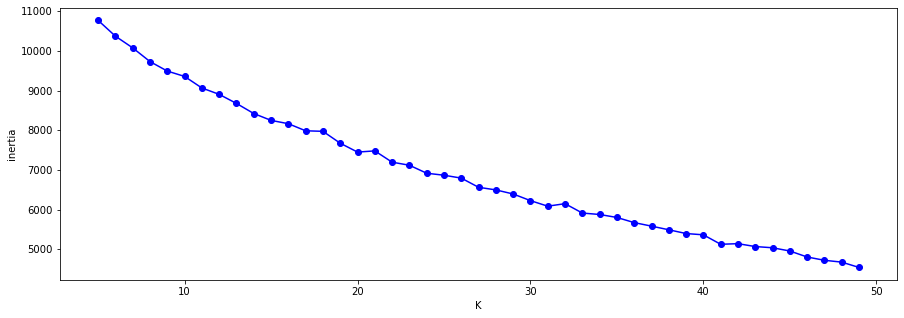

In [5]:
plt.figure(figsize=(15,5))
plt.plot(range(5,50) , inertias , "bo-")
plt.xlabel("K")
plt.ylabel("inertia")
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

silhouettes = [silhouette_score(X_train , model.labels_) for model in models]

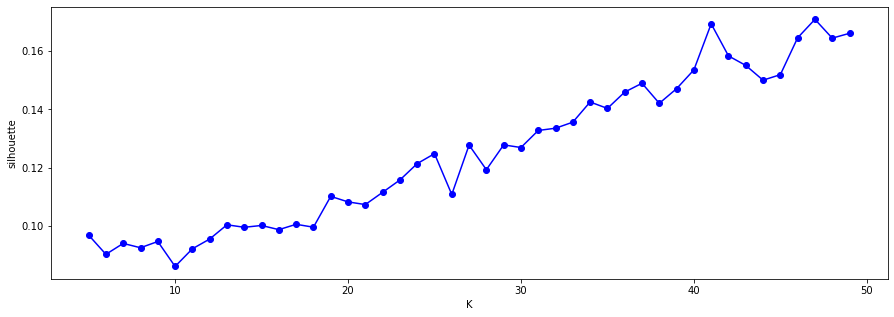

In [7]:
plt.figure(figsize=(15,5))
plt.plot(range(5,50) , silhouettes , "bo-")
plt.xlabel("K")
plt.ylabel("silhouette")
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=50 , random_state=42)
rf_clf.fit(X_train , y_train)
y_pred = rf_clf.predict(X_val)
accuracy_score(y_val , y_pred)

0.9

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("kmeans" , KMeans()),
    ("rf_clf" , RandomForestClassifier(n_estimators=50 , random_state=42))
])

param_grid = {"kmeans__n_clusters" : range(2,100)}
grid_search = GridSearchCV(pipeline , param_grid , cv = 3)
grid_search.fit(X_train , y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans()),
                                       ('rf_clf',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)})

In [10]:
print(grid_search.best_params_)
print(grid_search.score(X_val , y_val))

{'kmeans__n_clusters': 89}
0.77


In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.99 , random_state=42)
X_new = pca.fit_transform(X_train)

In [17]:
models = [GaussianMixture(n_components=k).fit(X_new) for k in range (1,50)]
bic = [model.bic(X_new) for model in models]
aic = [model.aic(X_new) for model in models]

C:\Users\itay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


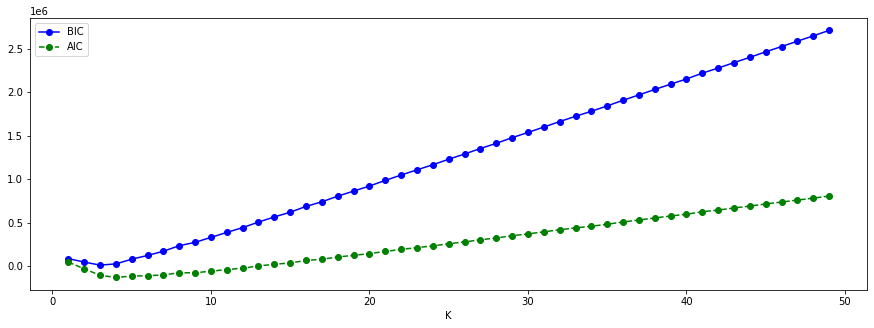

In [26]:
plt.figure(figsize=(15,5))
plt.plot(range(1,50) , bic , "bo-" , label = "BIC")
plt.plot(range(1,50) , aic , "go--" , label = "AIC")
plt.xlabel("K")
plt.legend()
plt.show()

In [42]:
gm = GaussianMixture(n_components=4)
gm.fit(X_new)
samples = gm.sample(1)

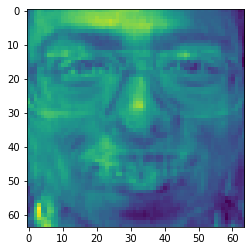

In [53]:
image = pca.inverse_transform(samples[0])
image = image.reshape(64,64)
plt.imshow(image)